# UniNa - Machine Learning 22/23 - MiniContest n1
---

### Data preparation

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv("Train.csv", index_col="ID")

In [3]:
df.head()

B12     B07     B06     B04     B03     B11     B8A     B02     B05  \
ID                                                                           
1   0.0903  0.4145  0.3290  0.0404  0.0580  0.1975  0.4480  0.0281  0.0945   
2   0.1108  0.4818  0.3650  0.0501  0.0624  0.2326  0.5060  0.0379  0.0959   
3   0.0896  0.4016  0.3082  0.0387  0.0515  0.1915  0.4217  0.0304  0.0872   
4   0.0803  0.3781  0.2893  0.0375  0.0499  0.1756  0.4025  0.0239  0.0764   
5   0.0900  0.3842  0.3060  0.0378  0.0510  0.1960  0.4217  0.0261  0.0903   

       B08 Class  
ID                
1   0.4236  High  
2   0.5192  High  
3   0.3974  High  
4   0.3937  High  
5   0.3858  High

In [4]:
X = df.drop("Class", axis=1)
y = df["Class"]

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 138376 entries, 1 to 138376
Data columns (total 11 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   B12     138376 non-null  float64
 1   B07     138376 non-null  float64
 2   B06     138376 non-null  float64
 3   B04     138376 non-null  float64
 4   B03     138376 non-null  float64
 5   B11     138376 non-null  float64
 6   B8A     138376 non-null  float64
 7   B02     138376 non-null  float64
 8   B05     138376 non-null  float64
 9   B08     138376 non-null  float64
 10  Class   138376 non-null  object 
dtypes: float64(10), object(1)
memory usage: 12.7+ MB


In [6]:
df.describe().T

count      mean       std     min     25%     50%     75%     max
B12  138376.0  0.092673  0.055448  0.0009  0.0646  0.0813  0.1002  1.1659
B07  138376.0  0.317097  0.099832  0.0001  0.2399  0.3191  0.3870  1.3427
B06  138376.0  0.257812  0.080769  0.0001  0.2023  0.2582  0.3063  1.3899
B04  138376.0  0.044877  0.064295  0.0001  0.0236  0.0292  0.0416  1.2784
B03  138376.0  0.058638  0.061676  0.0001  0.0396  0.0478  0.0595  1.3144
B11  138376.0  0.179133  0.067757  0.0002  0.1377  0.1787  0.2095  1.1635
B8A  138376.0  0.341384  0.102199  0.0001  0.2638  0.3444  0.4141  1.3244
B02  138376.0  0.036613  0.063294  0.0001  0.0202  0.0261  0.0328  1.3792
B05  138376.0  0.092983  0.063806  0.0001  0.0684  0.0807  0.0994  1.4750
B08  138376.0  0.324675  0.103344  0.0001  0.2460  0.3253  0.3973  1.3480

In [7]:
a

B12      0
B07      0
B06      0
B04      0
B03      0
B11      0
B8A      0
B02      0
B05      0
B08      0
Class    0
dtype: int64

In [8]:
y.value_counts()

Medium       31326
Absent       30615
High         30294
Low          27452
Very High    18689
Name: Class, dtype: int64

### Exploratory Data Analysis

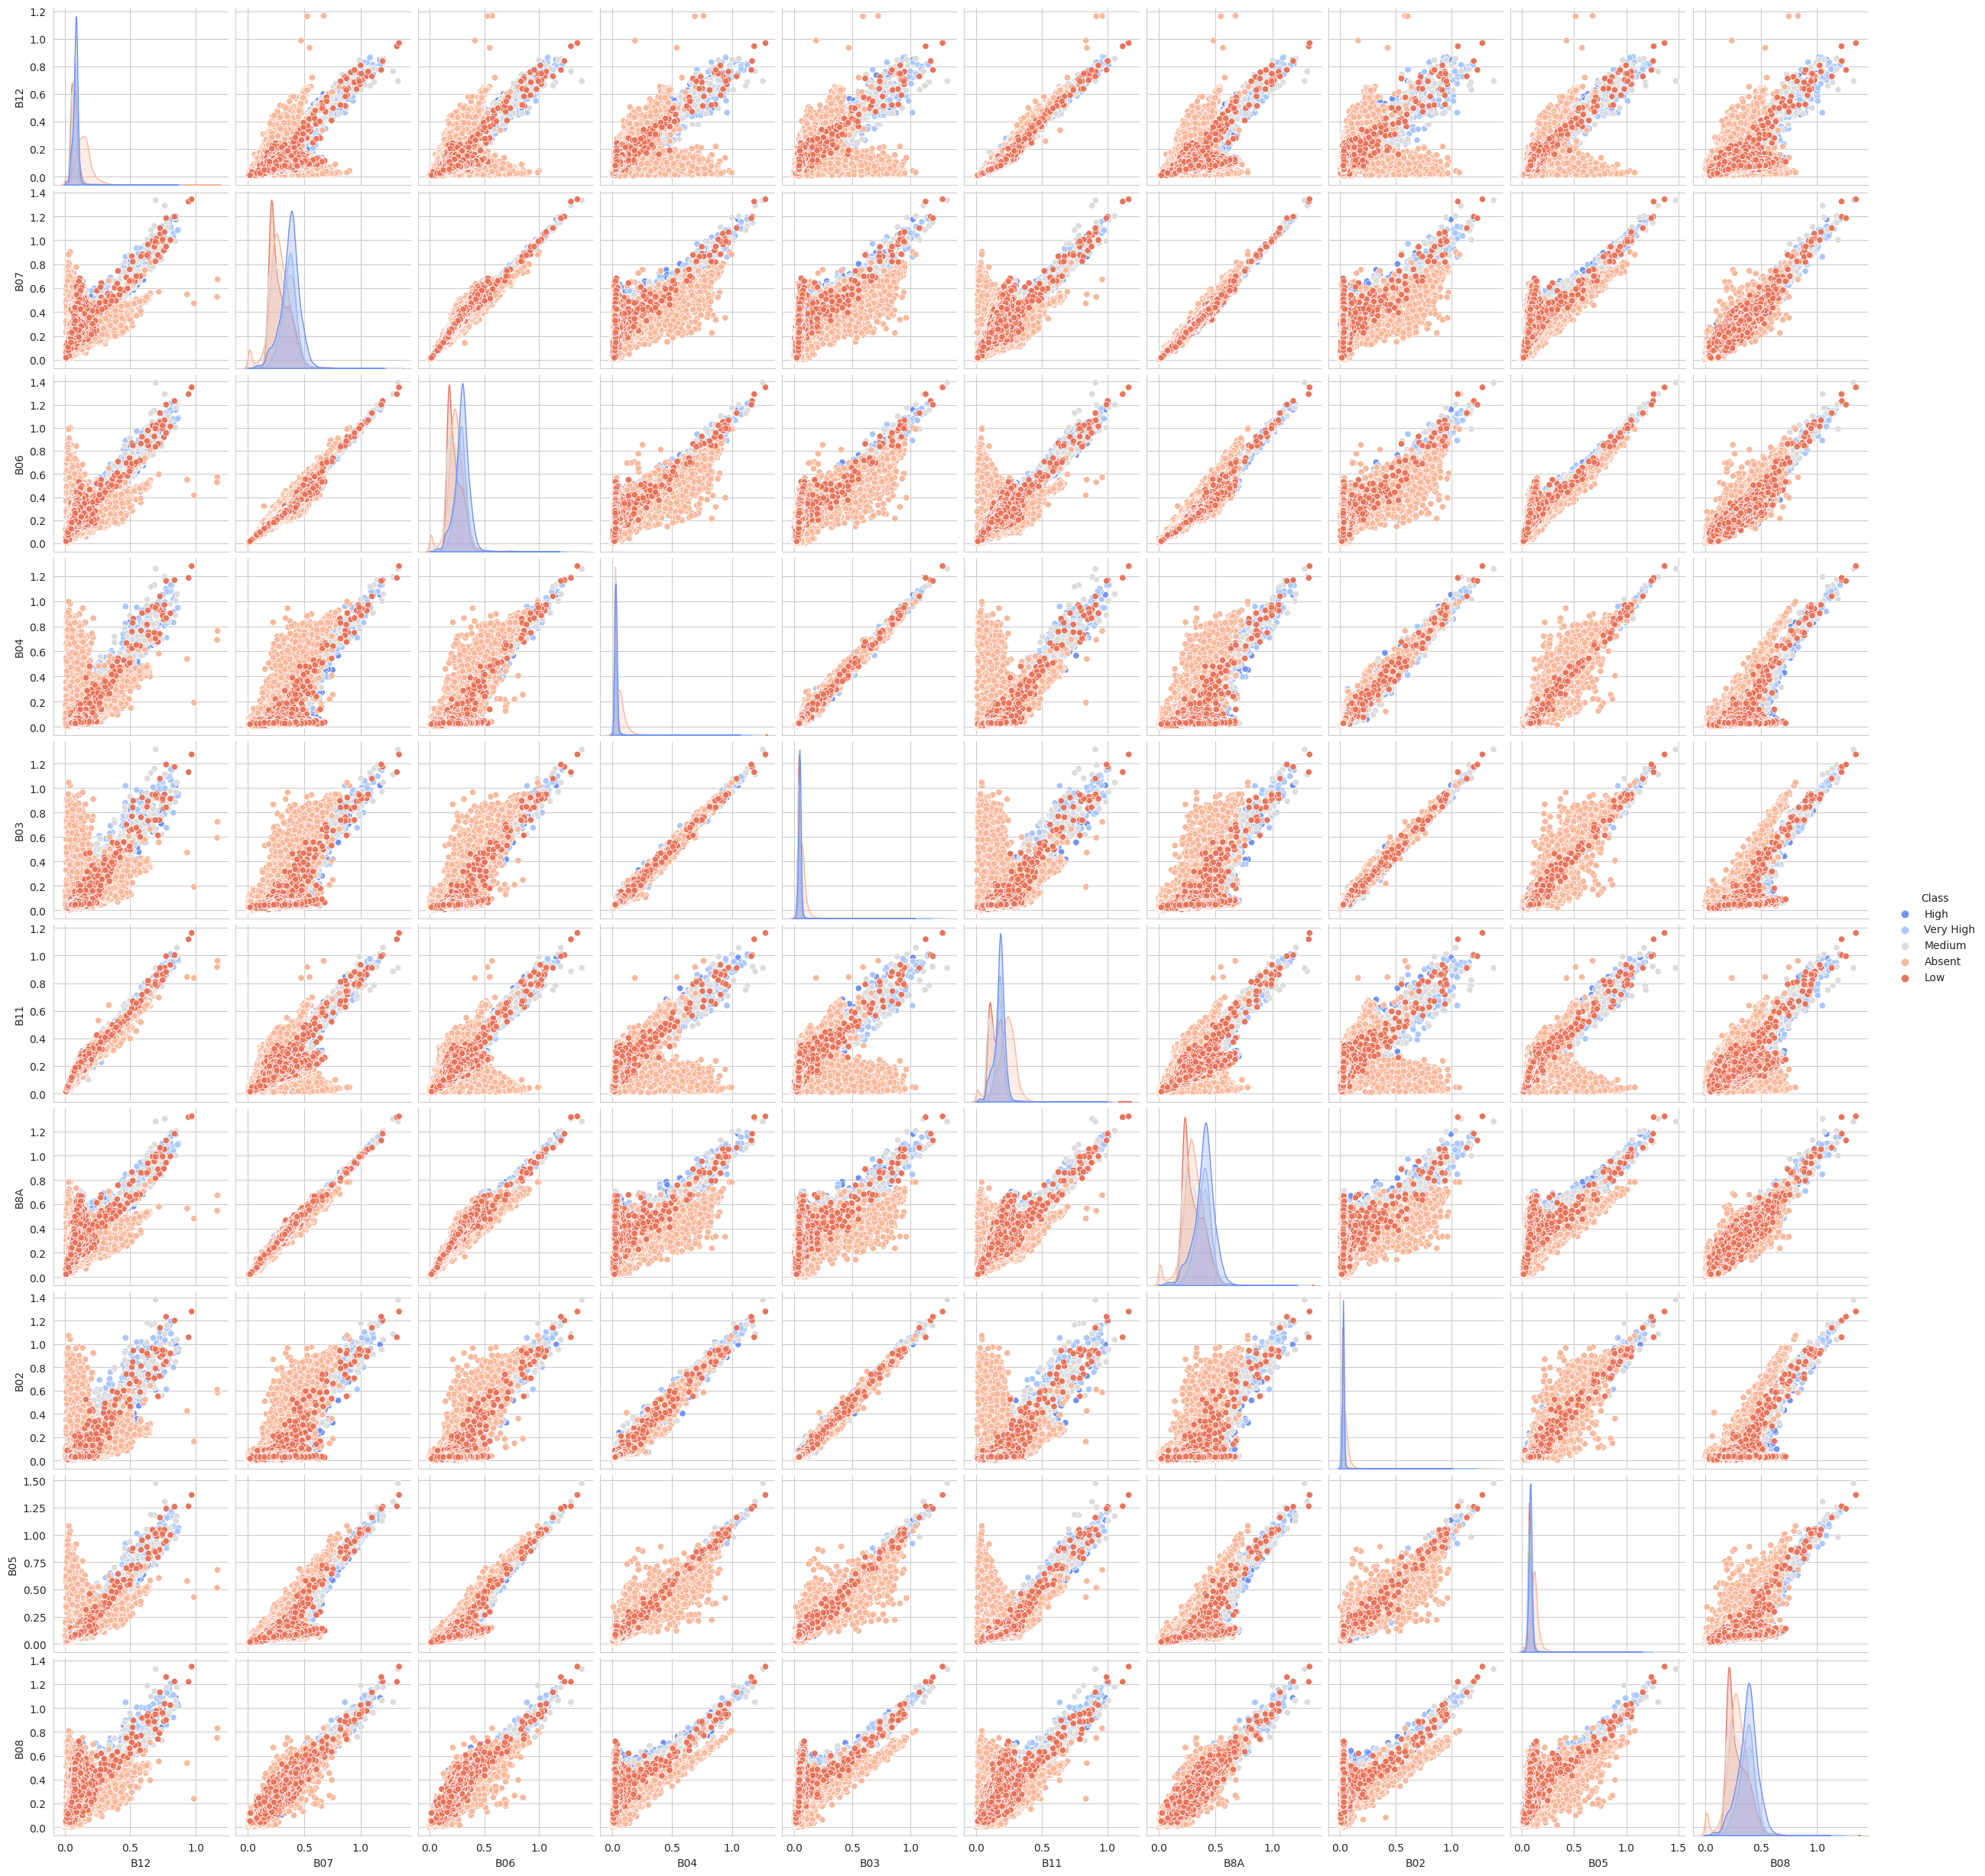

In [9]:
sns.set_style('whitegrid')
sns.pairplot(df, hue='Class', palette='coolwarm')

/tmp/ipykernel_12954/954606326.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, cmap='coolwarm')


<AxesSubplot: >

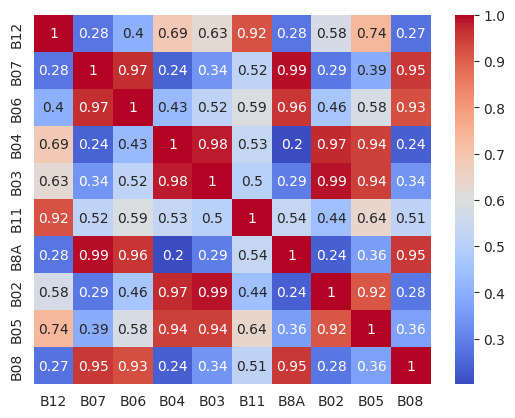

In [10]:
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')

Two features being highly correlated with each other will provide too much and useless information on finding the target (eg. B8A and B07).

The dataset is clean, there are not missing values (NaNs) so we can start with scaling, Train-Test-Split and applying the algorithms.

### Scaling data

In [11]:
from sklearn.preprocessing import RobustScaler

In [12]:
scaler = RobustScaler()

In [13]:
scaler.fit(X)

RobustScaler()

In [14]:
scaled_features = scaler.fit_transform(X)

In [18]:
X = pd.DataFrame(scaled_features, columns=df.columns[:-1])
X.head()

B12       B07       B06       B04       B03       B11       B8A  \
0  0.252809  0.648538  0.680769  0.622222  0.512563  0.261838  0.689288   
1  0.828652  1.106050  1.026923  1.161111  0.733668  0.750696  1.075183   
2  0.233146  0.560843  0.480769  0.527778  0.185930  0.178273  0.514305   
3 -0.028090  0.401088  0.299038  0.461111  0.105528 -0.043175  0.386560   
4  0.244382  0.442556  0.459615  0.477778  0.160804  0.240947  0.514305   

        B02       B05       B08  
0  0.158730  0.445161  0.649703  
1  0.936508  0.490323  1.281560  
2  0.341270  0.209677  0.476537  
3 -0.174603 -0.138710  0.452082  
4  0.000000  0.309677  0.399868

### Train test split

In [19]:
from sklearn.model_selection import train_test_split

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=100, stratify=y, shuffle=True)

## Decision Tree Classifier

In [21]:
from sklearn.tree import DecisionTreeClassifier

In [22]:
from sklearn.model_selection import GridSearchCV

In [23]:
dtree = DecisionTreeClassifier(random_state=42)

In [24]:
parameters = {
    'criterion' : ['gini', 'entropy', 'log_loss'],
    'max_depth' : [2, 3, 5, 10, 20, 25, 30],
    'min_samples_leaf': [5, 10, 20, 50, 75, 100],
}

In [25]:
grid_search = GridSearchCV(estimator=dtree,
                           param_grid=parameters,
                           n_jobs=-1,
                           cv=5,
                           scoring = "accuracy")

In [26]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [2, 3, 5, 10, 20, 25, 30],
                         'min_samples_leaf': [5, 10, 20, 50, 75, 100]},
             scoring='accuracy')

In [27]:
print(grid_search.best_params_)
dtree_best = grid_search.best_estimator_

{'criterion': 'entropy', 'max_depth': 25, 'min_samples_leaf': 50}


In [28]:
pred = dtree_best.predict(X_test)

In [29]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [30]:
print(confusion_matrix(y_test, pred))

[[6708  217  402  260   67]
 [ 146 5680  322  977  449]
 [ 684  600 3927 1209  443]
 [ 403 1366 1340 3898  824]
 [ 137  401  126  227 3781]]


In [31]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

      Absent       0.83      0.88      0.85      7654
        High       0.69      0.75      0.72      7574
         Low       0.64      0.57      0.61      6863
      Medium       0.59      0.50      0.54      7831
   Very High       0.68      0.81      0.74      4672

    accuracy                           0.69     34594
   macro avg       0.69      0.70      0.69     34594
weighted avg       0.69      0.69      0.69     34594



In [32]:
print(accuracy_score(y_test, pred))

0.693588483552061


## k-Nearest Neighbors Classifier

In [33]:
from sklearn.neighbors import KNeighborsClassifier

In [34]:
error_rate = []
for i in range(1,40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

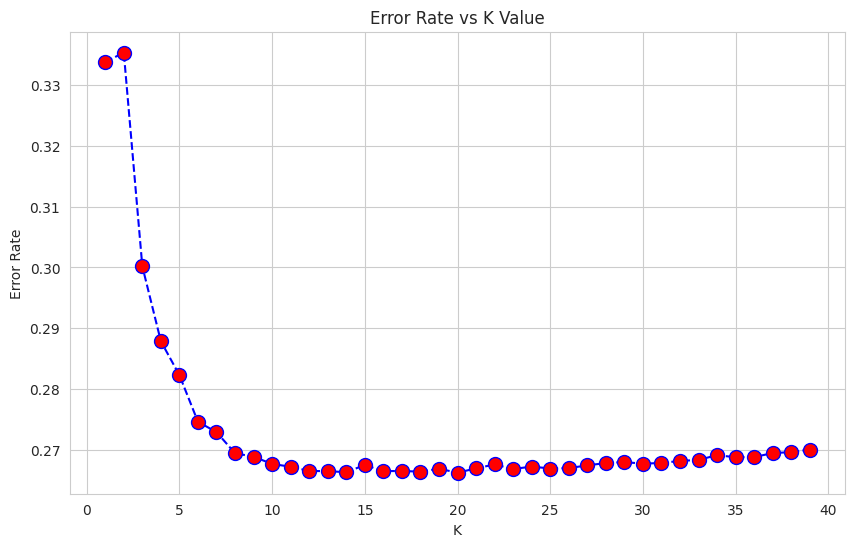

In [35]:
plt.figure(figsize=(10,6))
plt.title('Error Rate vs K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)

In [36]:
knn = KNeighborsClassifier(n_neighbors=20)

In [37]:
parameters = {
    'leaf_size': (1, 5, 10, 20, 30, 50),
    'p': (1,2),
    'weights': ('uniform', 'distance'),
    'metric': ('minkowski', 'chebyshev'),
}

In [38]:
grid_search = GridSearchCV(estimator=knn,
                           param_grid=parameters,
                           n_jobs=-1,
                           cv=5,
                           scoring = "accuracy")

In [39]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(n_neighbors=20), n_jobs=-1,
             param_grid={'leaf_size': (1, 5, 10, 20, 30, 50),
                         'metric': ('minkowski', 'chebyshev'), 'p': (1, 2),
                         'weights': ('uniform', 'distance')},
             scoring='accuracy')

In [40]:
print(grid_search.best_params_)
knn_best = grid_search.best_estimator_

{'leaf_size': 1, 'metric': 'minkowski', 'p': 2, 'weights': 'distance'}


In [41]:
pred = knn_best.predict(X_test)

In [42]:
print(confusion_matrix(y_test, pred))

[[6830  170  359  244   51]
 [  94 6054  257  787  382]
 [ 476  498 4271 1191  427]
 [ 222 1212 1241 4380  776]
 [  64  420   92  203 3893]]


In [43]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

      Absent       0.89      0.89      0.89      7654
        High       0.72      0.80      0.76      7574
         Low       0.69      0.62      0.65      6863
      Medium       0.64      0.56      0.60      7831
   Very High       0.70      0.83      0.76      4672

    accuracy                           0.74     34594
   macro avg       0.73      0.74      0.73     34594
weighted avg       0.73      0.74      0.73     34594



In [44]:
print(accuracy_score(y_test, pred))

0.735040758513037


## SVM

In [45]:
from sklearn.svm import SVC

In [46]:
svc = SVC()

In [47]:
parameters = {
    'C': [0.1, 1, 10, 100],
    'gamma': [1, 0.1, 0.01],
}

In [48]:
grid_search = GridSearchCV(estimator=svc,
                           param_grid=parameters,
                           n_jobs=-1,
                           cv=5,
                           scoring = "accuracy")

In [49]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=SVC(), n_jobs=-1,
             param_grid={'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01]},
             scoring='accuracy')

In [50]:
print(grid_search.best_params_)
svc_best = grid_search.best_estimator_

{'C': 10, 'gamma': 1}


In [51]:
pred = svc_best.predict(X_test)

In [52]:
print(confusion_matrix(y_test, pred))

[[7050   89  346  152   17]
 [ 176 6051  217  746  384]
 [ 495  393 4536 1045  394]
 [ 302 1079 1153 4576  721]
 [ 161  217   81  138 4075]]


In [53]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

      Absent       0.86      0.92      0.89      7654
        High       0.77      0.80      0.79      7574
         Low       0.72      0.66      0.69      6863
      Medium       0.69      0.58      0.63      7831
   Very High       0.73      0.87      0.79      4672

    accuracy                           0.76     34594
   macro avg       0.75      0.77      0.76     34594
weighted avg       0.76      0.76      0.76     34594



In [54]:
print(accuracy_score(y_test, pred))

0.7599005607908886


## Multi-layer Perceptron Classifier

In [55]:
from sklearn.neural_network import MLPClassifier

In [60]:
mlp = MLPClassifier(max_iter=2000)

In [61]:
parameters = {
    "activation" : ("identity", "logistic", "tanh", "relu"),
    "solver" : ("lbfgs", "sgd", "adam"),
    "alpha": [0.0001, 0.01],
    "hidden_layer_sizes" : ((50,50,50), (100,))
}

In [62]:
grid_search = GridSearchCV(estimator=mlp,
                           param_grid=parameters,
                           n_jobs=-1,
                           cv=5,
                           scoring = "accuracy")

In [63]:
grid_search.fit(X_train, y_train)

/home/szymon/Studia_AGH/Semestr_5/ML/Machine_learning_course_UNINA/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/home/szymon/Studia_AGH/Semestr_5/ML/Machine_learning_course_UNINA/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/home/szymon/Studia_AGH/Semestr_5/ML/Machine_learning_course

/home/szymon/Studia_AGH/Semestr_5/ML/Machine_learning_course_UNINA/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/szymon/Studia_AGH/Semestr_5/ML/Machine_learning_course_UNINA/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/szymon/Studia_AGH/Semestr_5/ML/Machine_learning_course_UNINA/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _che

/home/szymon/Studia_AGH/Semestr_5/ML/Machine_learning_course_UNINA/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/home/szymon/Studia_AGH/Semestr_5/ML/Machine_learning_course_UNINA/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/home/szymon/Studia_AGH/Semestr_5/ML/Machine_learning_course

/home/szymon/Studia_AGH/Semestr_5/ML/Machine_learning_course_UNINA/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/home/szymon/Studia_AGH/Semestr_5/ML/Machine_learning_course_UNINA/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/home/szymon/Studia_AGH/Semestr_5/ML/Machine_learning_course

GridSearchCV(cv=5, estimator=MLPClassifier(max_iter=2000), n_jobs=-1,
             param_grid={'activation': ('identity', 'logistic', 'tanh', 'relu'),
                         'alpha': [0.0001, 0.01],
                         'hidden_layer_sizes': ((50, 50, 50), (100,)),
                         'solver': ('lbfgs', 'sgd', 'adam')},
             scoring='accuracy')

In [64]:
print(grid_search.best_params_)
mlp_best = grid_search.best_estimator_

{'activation': 'logistic', 'alpha': 0.0001, 'hidden_layer_sizes': (50, 50, 50), 'solver': 'lbfgs'}


In [65]:
pred = mlp_best.predict(X_test)

In [66]:
print(confusion_matrix(y_test, pred))

[[7077   82  325  151   19]
 [  76 6160  244  702  392]
 [ 492  371 4584 1063  353]
 [ 216 1071 1198 4644  702]
 [  40  258   99  153 4122]]


In [67]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

      Absent       0.90      0.92      0.91      7654
        High       0.78      0.81      0.79      7574
         Low       0.71      0.67      0.69      6863
      Medium       0.69      0.59      0.64      7831
   Very High       0.74      0.88      0.80      4672

    accuracy                           0.77     34594
   macro avg       0.76      0.78      0.77     34594
weighted avg       0.77      0.77      0.76     34594



In [68]:
print(accuracy_score(y_test, pred))

0.7685436780944672


## Evaluating choosen model on a test data

In [69]:
test_df = pd.read_csv("Test.csv")

In [70]:
test_df.isnull().sum()

ID     0
B12    0
B07    0
B06    0
B04    0
B03    0
B11    0
B8A    0
B02    0
B05    0
B08    0
dtype: int64

In [71]:
test_df_no_ID = test_df.drop("ID", axis=1)

In [72]:
scaler.fit(test_df_no_ID)

RobustScaler()

In [73]:
scaled_test_features = scaler.fit_transform(test_df_no_ID)

In [74]:
scaled_test_set = pd.DataFrame(scaled_test_features, columns = test_df.columns[1:])
scaled_test_set.head()

B12       B07       B06       B04       B03       B11       B8A  \
0 -0.931624 -0.443843 -0.466094 -0.480226 -0.761421 -1.034819 -0.430371   
1  0.735043 -0.307172 -0.181471  1.180791  0.477157  0.566852 -0.218170   
2 -0.017094  0.582544  0.590258 -0.418079 -0.304569  0.168524  0.731432   
3 -0.333333  0.181326  0.178606 -0.796610 -0.553299 -0.192201  0.207560   
4 -1.091168 -0.665088 -0.654250 -0.683616 -0.786802 -1.278552 -0.700928   

        B02       B05       B08  
0 -0.722222 -0.665574 -0.592763  
1  0.365079  1.304918 -0.426974  
2 -0.555556 -0.150820  0.696711  
3 -0.587302 -0.495082  0.278947  
4 -0.785714 -0.639344 -0.607237

### Decision Tree Classifier predictions

In [75]:
test_pred_dtree = dtree_best.predict(scaled_test_set)

In [76]:
final_pred_dtree = pd.DataFrame(data={"ID": test_df["ID"],
                                      "Class": pd.Series(test_pred_dtree)})
final_pred_dtree.to_csv("mini_contest_1_results_dtree.csv", index=False)

### k-Nearest Neighbors Classifier

In [77]:
test_pred_knn = knn_best.predict(scaled_test_set)

In [78]:
final_pred_knn = pd.DataFrame(data={"ID": test_df["ID"],
                                    "Class": pd.Series(test_pred_knn)})
final_pred_knn.to_csv("mini_contest_1_results_knn.csv", index=False)

### SVM

In [79]:
test_pred_svm = svc_best.predict(scaled_test_set)

In [80]:
final_pred_svm = pd.DataFrame(data={"ID": test_df["ID"],
                                    "Class": pd.Series(test_pred_svm)})
final_pred_svm.to_csv("mini_contest_1_results_svm.csv", index=False)

### Multi-layer Perceptron Classifier

In [81]:
test_pred_mlp = mlp_best.predict(scaled_test_set)

In [82]:
final_pred_mlp = pd.DataFrame(data={"ID": test_df["ID"],
                                    "Class": pd.Series(test_pred_mlp)})
final_pred_mlp.to_csv("mini_contest_1_results_mlp.csv", index=False)